# Population Pyramid and TFR Modelling
Visualizing two female population distributions with varying TFR side by side

In [216]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [217]:
def pyramid_plot(sample1, title1, sample2, title2,  bins):
    plt.style.use('dark_background')

    ax1 = plt.subplot(1, 2, 2)
    ax1.hist(sample1, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
    ax1.title.set_text(title1)


    ax2 = plt.subplot(1, 2, 1)
    ax2.hist(sample2, bins=30, orientation="horizontal", edgecolor="black", color="pink")
    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_yticklabels([])
    ax2.yaxis.tick_right()
    ax2.title.set_text(title2)

    plt.show()

In [218]:
def next_generation(sample, tfr, sex_ratio):
    
    reproductive_cohort = [element for element in sample if (element >=15 and element <50)]
    bins = int(max(reproductive_cohort))-int(min(reproductive_cohort))
    
    new_samples = 0
    
    counts, bin_edges = np.histogram(reproductive_cohort, bins=bins)
    indexed_counts = list(enumerate(counts))

    for element in indexed_counts:
        age = element[0]+15
        rem_prod_age = 50-age
        population = element[1]
    
        scaling_factor = max(abs(age-35),1)
        adjusted_tfr = tfr*(1/scaling_factor)

        new_samples += int(sex_ratio*((adjusted_tfr*population)/rem_prod_age))
    
    additional_pop = [random.random() for _ in range(new_samples)] #random.random() gives values between 0 and 1, which works for our use case
    
    sample = sample + additional_pop
    
    #Aging
    sample = [element+1 for element in sample]
    
    
    #Death
    sample = [element for element in sample if element<=90]
    
    return sample

In [219]:
def population_initialize(population_mean_1=28.2, population_sd_1=12, population_size_1=10000,
                       population_mean_2=28.2, population_sd_2=12, population_size_2=3000):

    sample_1 = np.random.normal(population_mean_1, population_sd_1, population_size_1)
    sample_2 = np.random.normal(population_mean_2, population_sd_2, population_size_2)

    #Removing negative values
    sample_1 = [element for element in sample_1 if element>0]
    sample_2 = [element for element in sample_2 if element>0]

    return sample_1, sample_2

In [220]:
# Initializing the beginning population
next_generation_sample_1, next_generation_sample_2 = population_initialize()

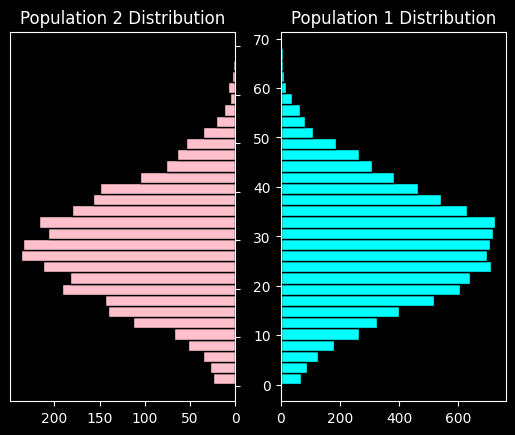

In [221]:
# Visualizing the beginning population
pyramid_plot(next_generation_sample_1,
             "Population 1 Distribution",
             next_generation_sample_2,
             "Population 2 Distribution",
             bins=30)

In [222]:
# Running the simulation for n years and plotting the result

tfr_1 = 1.9
tfr_2 = 2.4

ratio_list = []
working_ratio_list = []

for times in range(100):
    next_generation_sample_1 = next_generation(next_generation_sample_1, tfr=tfr_1, sex_ratio=0.5)
    next_generation_sample_2 = next_generation(next_generation_sample_2, tfr=tfr_2, sex_ratio=0.5)
    
    ratio = len(next_generation_sample_2) / len(next_generation_sample_1)
    ratio_list.append(ratio)
    
    working_age_1 = [element for element in next_generation_sample_1 if (element>=15 and element<=60)]
    working_age_2 = [element for element in next_generation_sample_2 if (element>=15 and element<=60)]
    
    working_ratio = len(working_age_2) / len(working_age_1)
    working_ratio_list.append(working_ratio)
    
    tfr_1 = tfr_1 - 0.002
    tfr_2 = tfr_2 - 0.0005

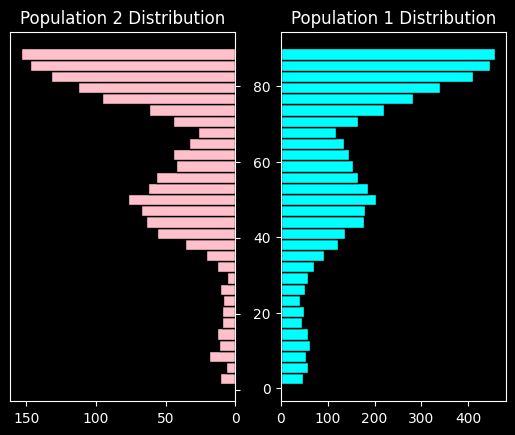

In [223]:
# Plotting the resulting population pyramid
pyramid_plot(next_generation_sample_1,
             "Population 1 Distribution",
             next_generation_sample_2,
             "Population 2 Distribution",
             bins=30)

In [224]:
len(next_generation_sample_1), len(next_generation_sample_2)

(4738, 1460)

In [225]:
len(next_generation_sample_2)/len(next_generation_sample_1)

0.3081468974250739

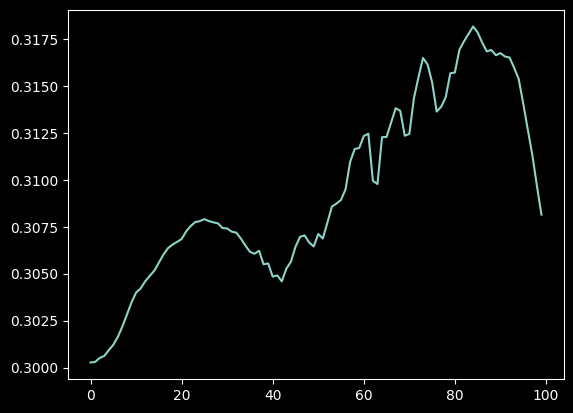

In [226]:
plt.plot(ratio_list)

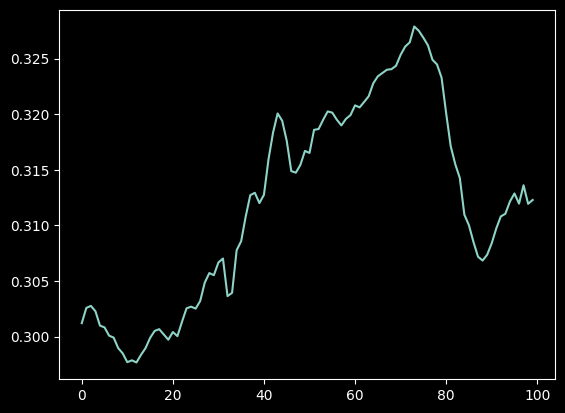

In [227]:
plt.plot(working_ratio_list)